## Export in Bay of Bengal seems to be unreasonably large at 100m

In [1]:
%reset
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/')
import scendict as sc
import utils as ut
import netCDF4 as nc
import xarray as xr
import numpy as np
from importlib import reload
reload(sc)
reload(ut)

import cartopy as cp
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import glob
plt.rcParams.update({'font.size': 14})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 14}



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
ylist = ut.make_yearlist(1960,2020,'diad_T','TOM12_TJ_1AS1')
with xr.set_options(enable_cftimeindex=True):
    TJ_1AS1 = xr.open_mfdataset(ylist)
    
ylist = ut.make_yearlist_data(1960,2020,'diad_T','TOM12_DW_WE43')
with xr.set_options(enable_cftimeindex=True):
    DW_WE43 = xr.open_mfdataset(ylist)



# size

In [3]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize'].attrs = dict(
        description="model cell area at surface, 0 if land",
        units="m^2",
    )
tmesh['csize_100'] = tmesh.tmask[0,10,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize_100'].attrs = dict(
        description="model cell area at 100m, 0 if land",
        units="m^2",
    )

In [4]:
Cflx_1AS1 = TJ_1AS1.Cflx
EXP_1AS1 = TJ_1AS1.EXP[:,10,:,:]
EXP_1AS1_percell = EXP_1AS1*tmesh.csize_100
Cflx_1AS1_percell= Cflx_1AS1*tmesh.csize

Cflx_WE43 = DW_WE43.Cflx
EXP_WE43 = DW_WE43.EXP[:,10,:,:]
EXP_WE43_percell = EXP_WE43*tmesh.csize_100
Cflx_WE43_percell= Cflx_WE43*tmesh.csize



In [5]:
EXP_1AS1

<xarray.DataArray 'EXP' (time_counter: 732, y: 149, x: 182)>
dask.array<getitem, shape=(732, 149, 182), dtype=float32, chunksize=(12, 149, 182), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    deptht         float32 105.96992
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1960-01-16 12:00:00 ... 2020-12-16 1...
Dimensions without coordinates: y, x
Attributes:
    long_name:           sinking+2
    units:               mol/m2/s
    online_operation:    average
    interval_operation:  5760 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 5760 s)

In [6]:
EXP_1AS1_percell_v = EXP_1AS1_percell.values
Cflx_1AS1_percell_v = Cflx_1AS1_percell.values
EXP_1AS1_percell_v[EXP_1AS1_percell_v==0] = np.nan

EXP_WE43_percell_v = EXP_WE43_percell.values
Cflx_WE43_percell_v = Cflx_WE43_percell.values
EXP_WE43_percell_v[EXP_WE43_percell_v==0] = np.nan

In [7]:
td = TJ_1AS1.indexes['time_counter'].to_datetimeindex()

In [8]:
EXP_WE43.values[0,92,6]

2.814522e-06

In [9]:
EXP_WE43.values[0,91,6]

9.900366e-08

Text(0.5, 1.0, 'export at 100m (depth level 10 with python indexing) \n at y = 92, x = 6 (21N, -90W, ie bay of bengal) \n as percent of total 100m export flux of model')

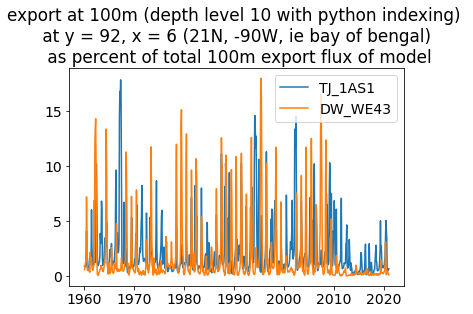

In [10]:
tot_EXP_1AS1 = np.nansum(np.nansum(EXP_1AS1_percell_v, axis =2),axis = 1)
plt.plot(td, EXP_1AS1_percell_v[:,92,6]/tot_EXP_1AS1*100, label = 'TJ_1AS1')
tot_EXP_WE43 = np.nansum(np.nansum(EXP_WE43_percell_v, axis =2),axis = 1)
plt.plot(td, EXP_WE43_percell_v[:,92,6]/tot_EXP_WE43*100, label = 'DW_WE43')
plt.legend()
plt.title('export at 100m (depth level 10 with python indexing) \n at y = 92, x = 6 (21N, -90W, ie bay of bengal) \n as percent of total 100m export flux of model')

Text(0.5, 1.0, 'export at 100m, DW_WE43, january 1960')

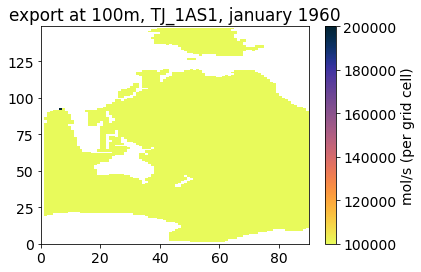

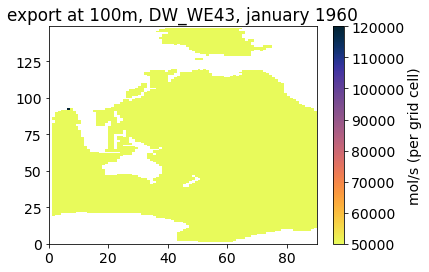

In [11]:
plt.figure()
plt.pcolormesh(EXP_1AS1_percell_v[0,:,0:90], vmin = 1e5, vmax = 2e5, cmap = cm.cm.thermal_r)
plt.colorbar(label = 'mol/s (per grid cell)')
plt.title('export at 100m, TJ_1AS1, january 1960')

plt.figure()
plt.pcolormesh(EXP_WE43_percell_v[0,:,0:90], vmin = 5e4, vmax = 1.2e5, cmap = cm.cm.thermal_r)
plt.colorbar(label = 'mol/s (per grid cell)')
plt.title('export at 100m, DW_WE43, january 1960')

SyntaxError: invalid syntax (2501492169.py, line 2)